In [ ]:
#Importing the required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import geopandas as gpd

# **Geospatial Analysis:** Utilize distribution_centers.csv and users.csv for mapping and analysing the geographic distribution of users and distribution centers.

In [ ]:
# Mount our google drive at google colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load the CSV into pandas dataframe
distribution_centers = pd.read_csv('/content/drive/My Drive/College Dunia Placement Imarticus/distribution_centers.csv')
users = pd.read_csv('/content/drive/My Drive/College Dunia Placement Imarticus/users.csv')

In [ ]:
#Checking shape of distribution centers
distribution_centers.shape

(10, 4)

In [ ]:
#Checking contents of distribution Centers
distribution_centers.head(10)

,id,name,latitude,longitude
0,1,Memphis TN,35.1174,-89.9711
1,2,Chicago IL,41.8369,-87.6847
2,3,Houston TX,29.7604,-95.3698
3,4,Los Angeles CA,34.0500,-118.2500
4,5,New Orleans LA,29.9500,-90.0667
5,6,Port Authority of New York/New Jersey NY/NJ,40.6340,-73.7834
6,7,Philadelphia PA,39.9500,-75.1667
7,8,Mobile AL,30.6944,-88.0431
8,9,Charleston SC,32.7833,-79.9333
9,10,Savannah GA,32.0167,-81.1167


In [ ]:
#Checking shape of users
users.shape

(100000, 15)

In [ ]:
#Checking contents of users
users.head(5)

,id,first_name,last_name,email,age,gender,state,street_address,postal_code,city,country,latitude,longitude,traffic_source,created_at
0,457,Timothy,Bush,timothybush@example.net,65,M,Acre,87620 Johnson Hills,69917-400,Rio Branco,Brasil,-9.945568,-67.83561,Search,2022-07-19 13:51:00+00:00
1,6578,Elizabeth,Martinez,elizabethmartinez@example.com,34,F,Acre,1705 Nielsen Land,69917-400,Rio Branco,Brasil,-9.945568,-67.83561,Search,2023-11-08 18:49:00+00:00
2,36280,Christopher,Mendoza,christophermendoza@example.net,13,M,Acre,125 Turner Isle Apt. 264,69917-400,Rio Branco,Brasil,-9.945568,-67.83561,Email,2019-08-24 06:10:00+00:00
3,60193,Jimmy,Conner,jimmyconner@example.com,64,M,Acre,0966 Jose Branch Apt. 008,69917-400,Rio Branco,Brasil,-9.945568,-67.83561,Search,2020-02-15 11:26:00+00:00
4,64231,Natasha,Wilson,natashawilson@example.net,25,F,Acre,20798 Phillip Trail Apt. 392,69917-400,Rio Branco,Brasil,-9.945568,-67.83561,Search,2020-03-13 06:45:00+00:00


In [ ]:
# checking description of the users dataframe
users.describe(include="all")

,id,first_name,last_name,email,age,gender,state,street_address,postal_code,city,country,latitude,longitude,traffic_source,created_at
count,100000.000000,100000,100000,100000,100000.000000,100000,100000,100000,100000,99042,100000,100000.000000,100000.000000,100000,100000
unique,NaN,690,1000,84011,NaN,2,229,99997,15694,7883,16,NaN,NaN,5,97754
top,NaN,Michael,Smith,michaelsmith@example.org,NaN,F,Guangdong,953 Jennifer Stravenue,02675-031,Shanghai,China,NaN,NaN,Search,2023-12-25 01:28:00+00:00
freq,NaN,2319,2194,23,NaN,50208,5380,2,406,2525,34150,NaN,NaN,70075,4
mean,50000.500000,NaN,NaN,NaN,41.054790,NaN,NaN,NaN,NaN,NaN,NaN,28.315885,25.020268,NaN,NaN
std,28867.657797,NaN,NaN,NaN,17.043914,NaN,NaN,NaN,NaN,NaN,NaN,22.024165,89.989960,NaN,NaN
min,1.000000,NaN,NaN,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,NaN,-43.007536,-158.164931,NaN,NaN
25%,25000.750000,NaN,NaN,NaN,26.000000,NaN,NaN,NaN,NaN,NaN,NaN,26.148665,-50.794605,NaN,NaN
50%,50000.500000,NaN,NaN,NaN,41.000000,NaN,NaN,NaN,NaN,NaN,NaN,35.219886,4.793600,NaN,NaN
75%,75000.250000,NaN,NaN,NaN,56.000000,NaN,NaN,NaN,NaN,NaN,NaN,40.707772,116.376103,NaN,NaN


In [ ]:
#Checking for null values and its sum, if any.
users.isnull().sum()

id                  0
first_name          0
last_name           0
email               0
age                 0
gender              0
state               0
street_address      0
postal_code         0
city              958
country             0
latitude            0
longitude           0
traffic_source      0
created_at          0
dtype: int64

In [ ]:
# Here we can observe that there are 958 null values in the city column.
#Since this number is very smaller as compared to the whole dataset and can be neglected. So we will drop the rows with null values.
users.dropna(inplace=True)

In [ ]:
#Checking if the null values are dropped.
users.isnull().sum()

id                0
first_name        0
last_name         0
email             0
age               0
gender            0
state             0
street_address    0
postal_code       0
city              0
country           0
latitude          0
longitude         0
traffic_source    0
created_at        0
dtype: int64

<Axes: >

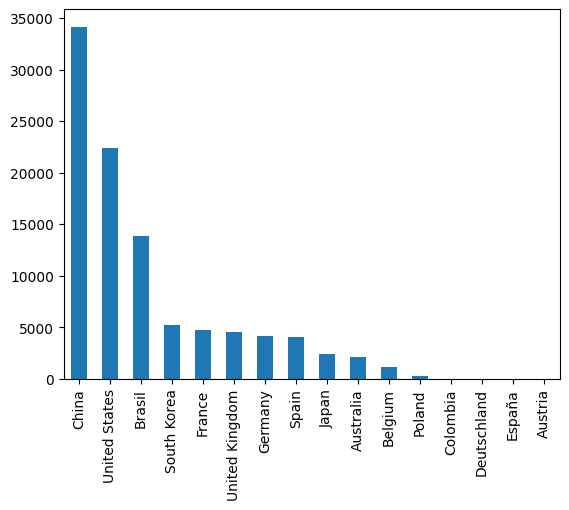

In [ ]:
# Lets plot a bar grapgh of count of users in different countries
users['country'].value_counts().plot(kind='bar')

In [ ]:
# We can see that most of the users are from China, United States and Brasil. Let's get a count of the same.
users.country.value_counts()

China             34133
United States     22352
Brasil            13835
South Korea        5269
France             4700
United Kingdom     4561
Germany            4149
Spain              4016
Japan              2438
Australia          2146
Belgium            1185
Poland              235
Colombia             17
Deutschland           2
España                2
Austria               2
Name: country, dtype: int64

<ipython-input-17-8d4834e9ab1e>:7: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


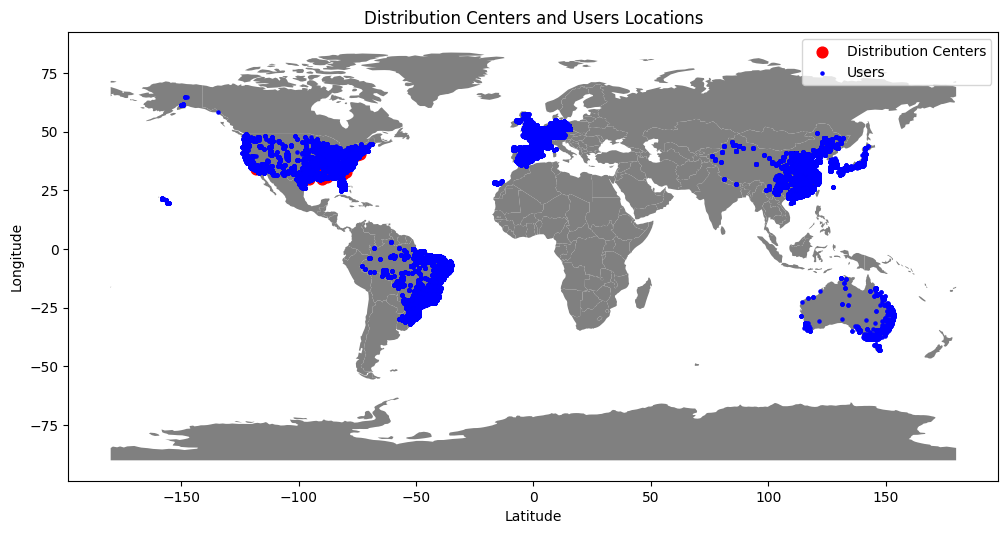

In [ ]:
# Lets plot our users and distribution centers data on world map.
# Lets create our distribution centres and users geo data frame using their longitude and latitude
gdf_dist = gpd.GeoDataFrame(distribution_centers, geometry=gpd.points_from_xy(distribution_centers['longitude'], distribution_centers['latitude']))
gdf_users = gpd.GeoDataFrame(users, geometry=gpd.points_from_xy(users['longitude'], users['latitude']))

# Loading the open source map for plotting
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Plot the above geodata frames on the map
fig, ax = plt.subplots(figsize=(12, 8))
world.plot(ax=ax, color='grey')
gdf_dist.plot(ax=ax, color='red', label='Distribution Centers', markersize=60)
gdf_users.plot(ax=ax, color='blue', label='Users', markersize= 5)
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Distribution Centers and Users Locations')
plt.legend()
plt.show()

# **Final Insights:**
1) We have highest numbers of users in China, United States and Brasil whereas very low userbase in Deutschland, España and Austria. We need to work upon increasing our userbase in these countries.
2) The highest userbase contributor city is Shanghai from China.
3) Since we have large userbase in China and Brasil, we should open up new Distribution Centres to better serve the users.

# **User Behaviour Analysis:** Use events.csv to analyse user behaviour, including session patterns, traffic sources, and event types.

In [ ]:
#Importing the csv file.
events = pd.read_csv('/content/drive/My Drive/College Dunia Placement Imarticus/events.csv')

In [ ]:
#Checking shape of events
events.shape

(2431963, 13)

In [ ]:
#Checking contents of events
events.head(5)

,id,user_id,sequence_number,session_id,created_at,ip_address,city,state,postal_code,browser,traffic_source,uri,event_type
0,2198523,NaN,3,83889ed2-2adc-4b9a-af5d-154f6998e778,2021-06-17 17:30:00+00:00,138.143.9.202,São Paulo,São Paulo,02675-031,Chrome,Adwords,/cancel,cancel
1,1773216,NaN,3,7a3fc3f2-e84f-44fe-8876-eff76741f7a3,2020-08-07 08:41:00+00:00,85.114.141.79,Santa Isabel,São Paulo,07500-000,Safari,Adwords,/cancel,cancel
2,2380515,NaN,3,13d9b2fb-eee1-43fd-965c-267b38dd7125,2021-02-15 18:48:00+00:00,169.250.255.132,Mairiporã,São Paulo,07600-000,IE,Adwords,/cancel,cancel
3,2250597,NaN,3,96f1d44e-9621-463c-954c-d8deb7fffe7f,2022-03-30 10:56:00+00:00,137.25.222.160,Cajamar,São Paulo,07750-000,Chrome,Adwords,/cancel,cancel
4,1834446,NaN,3,d09dce10-a7cb-47d3-a9af-44975566fa03,2019-09-05 01:18:00+00:00,161.114.4.174,São Paulo,São Paulo,09581-680,Chrome,Email,/cancel,cancel


In [ ]:
#Checking for null values and its sum, if any.
events.isnull().sum()

id                       0
user_id            1125671
sequence_number          0
session_id               0
created_at               0
ip_address               0
city                 23080
state                    0
postal_code              0
browser                  0
traffic_source           0
uri                      0
event_type               0
dtype: int64

In [ ]:
# Since user id is of no use to us for the analysis, we will drop the column 'user_id'
events.drop(['user_id'], axis=1, inplace=True)

In [ ]:
#Checking shape of events again
events.shape

(2431963, 12)

In [ ]:
# Also we have 23080 null values in the city column, which is hardly 1% of the data we can delete the rows with null values.
events.dropna(inplace=True)

In [ ]:
#Checking if the null values are dropped.
events.isnull().sum()

id                 0
sequence_number    0
session_id         0
created_at         0
ip_address         0
city               0
state              0
postal_code        0
browser            0
traffic_source     0
uri                0
event_type         0
dtype: int64

In [ ]:
# Checking description of the data
events.describe(include="all")

,id,sequence_number,session_id,created_at,ip_address,city,state,postal_code,browser,traffic_source,uri,event_type
count,2.408883e+06,2.408883e+06,2408883,2408883,2408883,2408883,2408883,2408883,2408883,2408883,2408883,2408883
unique,NaN,NaN,675215,2125258,675141,8775,231,17188,5,5,35530,6
top,NaN,NaN,54df2b91-f027-43c2-8fbf-868a68f78431,2021-10-27 03:05:00+00:00,196.46.153.171,Shanghai,Guangdong,02675-031,Chrome,Email,/cart,product
freq,NaN,NaN,13,8,17,60561,129796,10147,1207136,1082081,590374,837515
mean,1.215984e+06,3.316161e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,7.019513e+05,2.676053e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000e+00,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,6.082415e+05,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,1.215767e+06,2.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.823878e+06,4.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# For session patterns, we will use the session 'created at' column to plot the time at which the session was created.
# First we will check the data type of created at column. And if need, will change as per our requirement.
events.dtypes

id                  int64
sequence_number     int64
session_id         object
created_at         object
ip_address         object
city               object
state              object
postal_code        object
browser            object
traffic_source     object
uri                object
event_type         object
dtype: object

In [ ]:
# But first we have to convert the datatype of created at timestamp
def parse_timestamp(timestamp_str):
    try:
        return pd.to_datetime(timestamp_str, format='%Y-%m-%d %H:%M:%S.%f')
    except ValueError:
        return pd.to_datetime(timestamp_str)

In [ ]:
#Converting datatype of created at column
events['created_at'] = events['created_at'].apply(parse_timestamp)

In [ ]:
# Checking datatypes again before proceeding further
events.dtypes

id                               int64
sequence_number                  int64
session_id                      object
created_at         datetime64[ns, UTC]
ip_address                      object
city                            object
state                           object
postal_code                     object
browser                         object
traffic_source                  object
uri                             object
event_type                      object
dtype: object

In [ ]:
# We have to remove the UTC from the timestamp data
events['created_at'] = events['created_at'].dt.tz_localize(None)

In [ ]:
# Checking datatypes again before proceeding further
events.dtypes

id                          int64
sequence_number             int64
session_id                 object
created_at         datetime64[ns]
ip_address                 object
city                       object
state                      object
postal_code                object
browser                    object
traffic_source             object
uri                        object
event_type                 object
dtype: object

In [ ]:
# We will extract hours from our datetime stamp column to check when most of our users are active.
events['hourOfTimestamp'] = events['created_at'].dt.hour

<Axes: >

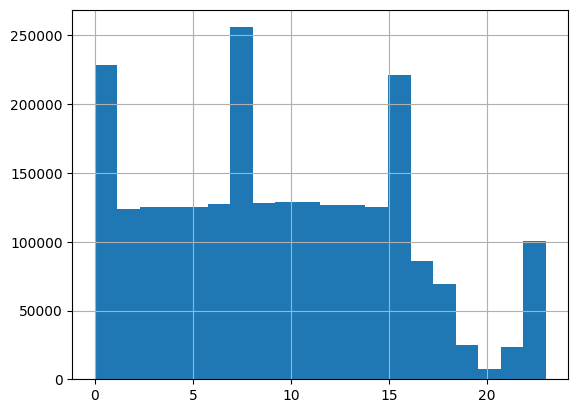

In [ ]:
# Lets plot a histgram of users active accross various hours
events['hourOfTimestamp'].hist(bins=20)

<Axes: xlabel='traffic_source', ylabel='id'>

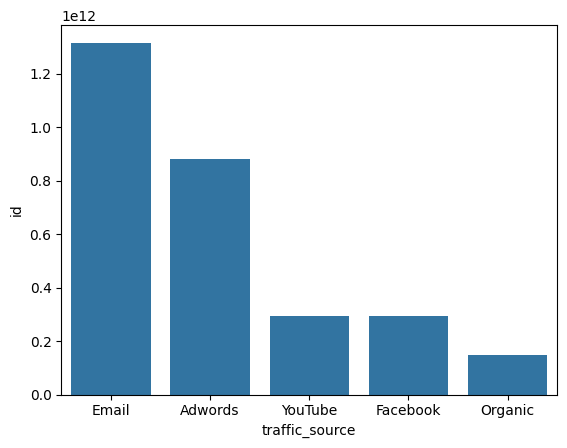

In [ ]:
# Lets create a bar graph to understand the traffic source
trfc_src = events.groupby(['traffic_source'],as_index=False)['id'].sum().sort_values(by='id',ascending=False)
sns.barplot(x='traffic_source', y='id',data= trfc_src)

<Axes: >

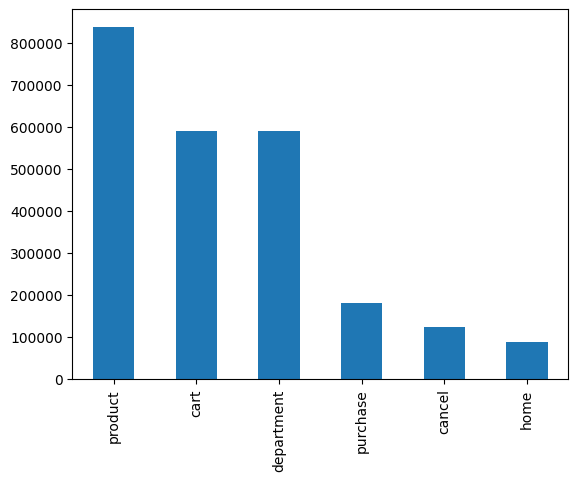

In [ ]:
# Lets create a bar plot to understand the event types
events['event_type'].value_counts().plot(kind='bar')

# **Final Insights:**

1) Most of our session is created at early Morning, Afternoon and Midnight. We have to improve our website session by evening.
2) Email and adwords contribute to the maximum traffic to our website. We should try to drive more traffic from social medias.
3) Most of the products are either purchased or in the shopping cart. We shall try to convert the items in the cart to the final purchase.

# **Sales and Revenue Analysis:** Leverage order_items.csv and inventory_items.csv to analyse product sales, revenue, and profitability.

In [ ]:
#Importing the csv file.
order_items = pd.read_csv('/content/drive/My Drive/College Dunia Placement Imarticus/order_items.csv')
inventory_items = pd.read_csv('/content/drive/My Drive/College Dunia Placement Imarticus/inventory_items.csv')

In [ ]:
#Checking shape of order_items
order_items.shape

(181759, 11)

In [ ]:
#Checking contents of order_items
order_items.head(5)

,id,order_id,user_id,product_id,inventory_item_id,status,created_at,shipped_at,delivered_at,returned_at,sale_price
0,152013,104663,83582,14235,410368,Cancelled,2023-05-07 06:08:40+00:00,NaN,NaN,NaN,0.02
1,40993,28204,22551,14235,110590,Complete,2023-03-14 03:47:21+00:00,2023-03-15 22:57:00+00:00,2023-03-18 01:08:00+00:00,NaN,0.02
2,51224,35223,28215,14235,138236,Complete,2023-12-05 13:25:30+00:00,2023-12-06 01:20:00+00:00,2023-12-10 10:04:00+00:00,NaN,0.02
3,36717,25278,20165,14235,99072,Shipped,2023-12-22 20:48:19+00:00,2023-12-24 16:44:00+00:00,NaN,NaN,0.02
4,131061,90241,71954,14235,353798,Shipped,2022-06-19 16:57:59+00:00,2022-06-19 19:29:00+00:00,NaN,NaN,0.02


In [ ]:
#Checking for null values and its sum, if any.
events.isnull().sum()

id                 0
sequence_number    0
session_id         0
created_at         0
ip_address         0
city               0
state              0
postal_code        0
browser            0
traffic_source     0
uri                0
event_type         0
hourOfTimestamp    0
dtype: int64

In [ ]:
# Since Shipping, Delivery and Return date columns have lots of null values and will not be required to us for calculating sales, revenue or profitability.
# We will drop these columns.
order_items.drop(['shipped_at','delivered_at','returned_at'], axis=1, inplace=True)

In [ ]:
#Checking shape of order_items again
order_items.shape

(181759, 8)

In [ ]:
#Checking shape of inventory_items
inventory_items.shape

(490705, 12)

In [ ]:
#Checking contents of inventory_items
inventory_items.head(5)

,id,product_id,created_at,sold_at,cost,product_category,product_name,product_brand,product_retail_price,product_department,product_sku,product_distribution_center_id
0,67971,13844,2022-07-02 07:09:20+00:00,2022-07-24 06:33:20+00:00,2.76804,Accessories,(ONE) 1 Satin Headband,Funny Girl Designs,6.99,Women,2A3E953A5E3D81E67945BCE5519F84C8,7
1,67972,13844,2023-12-20 03:28:00+00:00,NaN,2.76804,Accessories,(ONE) 1 Satin Headband,Funny Girl Designs,6.99,Women,2A3E953A5E3D81E67945BCE5519F84C8,7
2,67973,13844,2023-06-04 02:53:00+00:00,NaN,2.76804,Accessories,(ONE) 1 Satin Headband,Funny Girl Designs,6.99,Women,2A3E953A5E3D81E67945BCE5519F84C8,7
3,72863,13844,2021-10-16 22:58:52+00:00,2021-11-22 02:19:52+00:00,2.76804,Accessories,(ONE) 1 Satin Headband,Funny Girl Designs,6.99,Women,2A3E953A5E3D81E67945BCE5519F84C8,7
4,72864,13844,2021-08-07 16:33:00+00:00,NaN,2.76804,Accessories,(ONE) 1 Satin Headband,Funny Girl Designs,6.99,Women,2A3E953A5E3D81E67945BCE5519F84C8,7


In [ ]:
# We will merge order items and inventory items by right join on product id as a new dataframe 'merged' for further analysis
merged = pd.merge(order_items, inventory_items, how="right", on=["product_id"])

In [ ]:
# Checking contents of merged dataframe
merged.head(5)

,id_x,order_id,user_id,product_id,inventory_item_id,status,created_at_x,sale_price,id_y,created_at_y,sold_at,cost,product_category,product_name,product_brand,product_retail_price,product_department,product_sku,product_distribution_center_id
0,39964,27520,22002,13844,107800,Complete,2024-01-13 23:58:59+00:00,6.99,67971,2022-07-02 07:09:20+00:00,2022-07-24 06:33:20+00:00,2.76804,Accessories,(ONE) 1 Satin Headband,Funny Girl Designs,6.99,Women,2A3E953A5E3D81E67945BCE5519F84C8,7
1,90973,62598,50041,13844,245524,Processing,2020-12-17 23:40:05+00:00,6.99,67971,2022-07-02 07:09:20+00:00,2022-07-24 06:33:20+00:00,2.76804,Accessories,(ONE) 1 Satin Headband,Funny Girl Designs,6.99,Women,2A3E953A5E3D81E67945BCE5519F84C8,7
2,25190,17428,13873,13844,67973,Shipped,2022-07-24 06:33:20+00:00,6.99,67971,2022-07-02 07:09:20+00:00,2022-07-24 06:33:20+00:00,2.76804,Accessories,(ONE) 1 Satin Headband,Funny Girl Designs,6.99,Women,2A3E953A5E3D81E67945BCE5519F84C8,7
3,27016,18686,14870,13844,72864,Shipped,2021-11-22 02:19:52+00:00,6.99,67971,2022-07-02 07:09:20+00:00,2022-07-24 06:33:20+00:00,2.76804,Accessories,(ONE) 1 Satin Headband,Funny Girl Designs,6.99,Women,2A3E953A5E3D81E67945BCE5519F84C8,7
4,37741,25990,20739,13844,101827,Shipped,2023-11-15 13:49:09+00:00,6.99,67971,2022-07-02 07:09:20+00:00,2022-07-24 06:33:20+00:00,2.76804,Accessories,(ONE) 1 Satin Headband,Funny Girl Designs,6.99,Women,2A3E953A5E3D81E67945BCE5519F84C8,7


In [ ]:
# Checking shape of merged dataframe
merged.shape

(3588767, 19)

In [ ]:
# Checking description of merged dataframe
merged.describe(include="all")

,id_x,order_id,user_id,product_id,inventory_item_id,status,created_at_x,sale_price,id_y,created_at_y,sold_at,cost,product_category,product_name,product_brand,product_retail_price,product_department,product_sku,product_distribution_center_id
count,3.588767e+06,3.588767e+06,3.588767e+06,3.588767e+06,3.588767e+06,3588767,3588767,3.588767e+06,3.588767e+06,3588767,1329133,3.588767e+06,3588767,3588622,3585981,3.588767e+06,3588767,3588767,3.588767e+06
unique,NaN,NaN,NaN,NaN,NaN,5,181526,NaN,NaN,463339,181526,NaN,26,27236,2752,NaN,2,29046,NaN
top,NaN,NaN,NaN,NaN,NaN,Shipped,2024-01-05 23:48:08+00:00,NaN,NaN,2023-06-01 02:11:00+00:00,2024-01-02 10:42:41+00:00,NaN,Jeans,Puma Men's Socks,Allegra K,NaN,Men,6B45CF467A9C88001159A826E92C7437,NaN
freq,NaN,NaN,NaN,NaN,NaN,1074771,67,NaN,NaN,45,24,NaN,254291,1449,120826,NaN,1943596,1218,NaN
mean,9.080926e+04,6.253131e+04,4.994445e+04,1.585489e+04,2.451009e+05,NaN,NaN,5.991912e+01,2.452339e+05,NaN,NaN,2.882094e+01,NaN,NaN,NaN,5.991912e+01,NaN,NaN,5.036186e+00
std,5.246110e+04,3.612026e+04,2.882637e+04,8.368498e+03,1.416393e+05,NaN,NaN,6.755949e+01,1.416614e+05,NaN,NaN,3.143095e+01,NaN,NaN,NaN,6.755949e+01,NaN,NaN,2.896872e+00
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,3.000000e+00,NaN,NaN,2.000000e-02,1.000000e+00,NaN,NaN,8.300000e-03,NaN,NaN,NaN,2.000000e-02,NaN,NaN,1.000000e+00
25%,4.541750e+04,3.124800e+04,2.502200e+04,8.719000e+03,1.225030e+05,NaN,NaN,2.495000e+01,1.226375e+05,NaN,NaN,1.143100e+01,NaN,NaN,NaN,2.495000e+01,NaN,NaN,2.000000e+00
50%,9.081800e+04,6.248600e+04,4.995300e+04,1.700000e+04,2.451000e+05,NaN,NaN,3.999000e+01,2.453120e+05,NaN,NaN,1.991520e+01,NaN,NaN,NaN,3.999000e+01,NaN,NaN,5.000000e+00
75%,1.361720e+05,9.374300e+04,7.477400e+04,2.297400e+04,3.675710e+05,NaN,NaN,6.995000e+01,3.677950e+05,NaN,NaN,3.463300e+01,NaN,NaN,NaN,6.995000e+01,NaN,NaN,8.000000e+00


<Axes: xlabel='product_name', ylabel='order_id'>

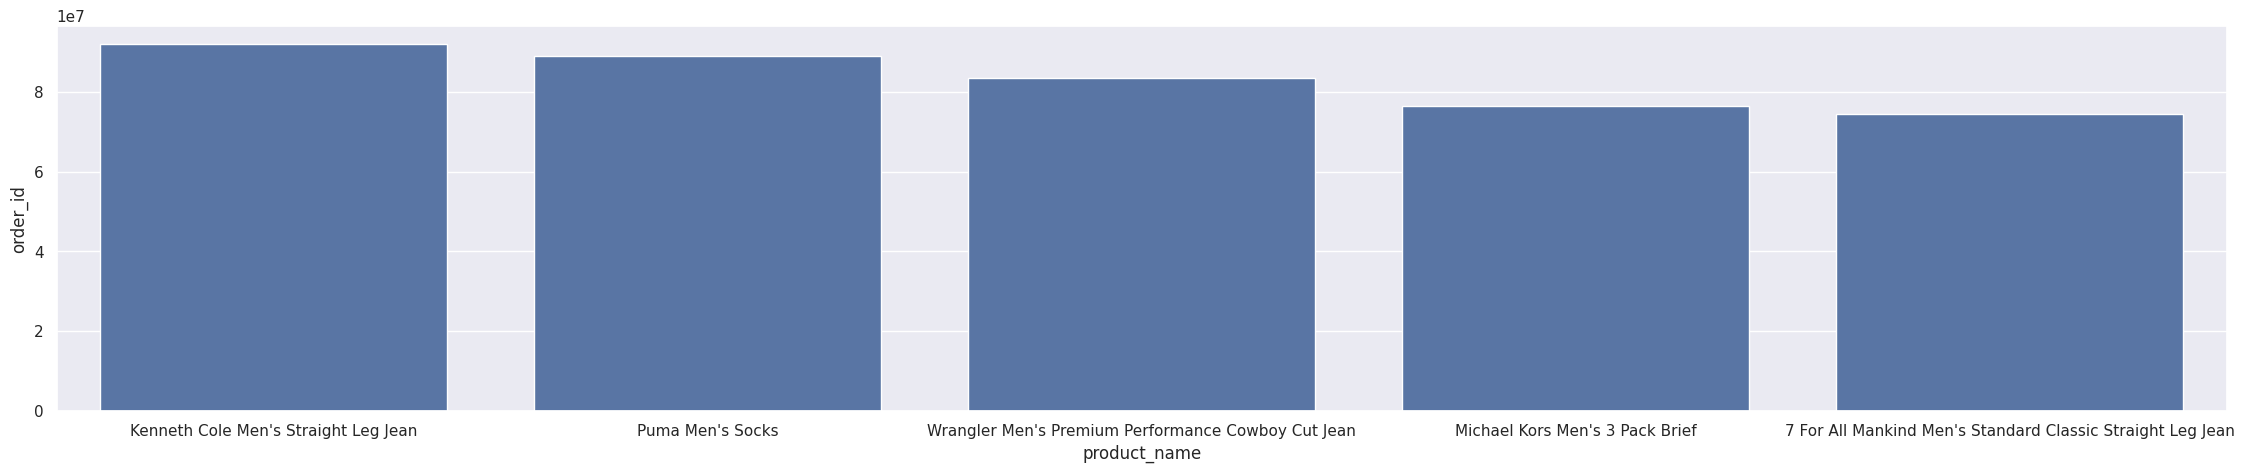

In [ ]:
# Lets find the top 5 products sold by count by order id
Top_five = merged.groupby(['product_name'],as_index=False)['order_id'].sum().sort_values(by='order_id',ascending=False).head(5)
sns.set(rc={'figure.figsize':(28,5)})
sns.barplot(data=sales_state,x='product_name',y='order_id')

<Axes: xlabel='product_name', ylabel='sale_price'>

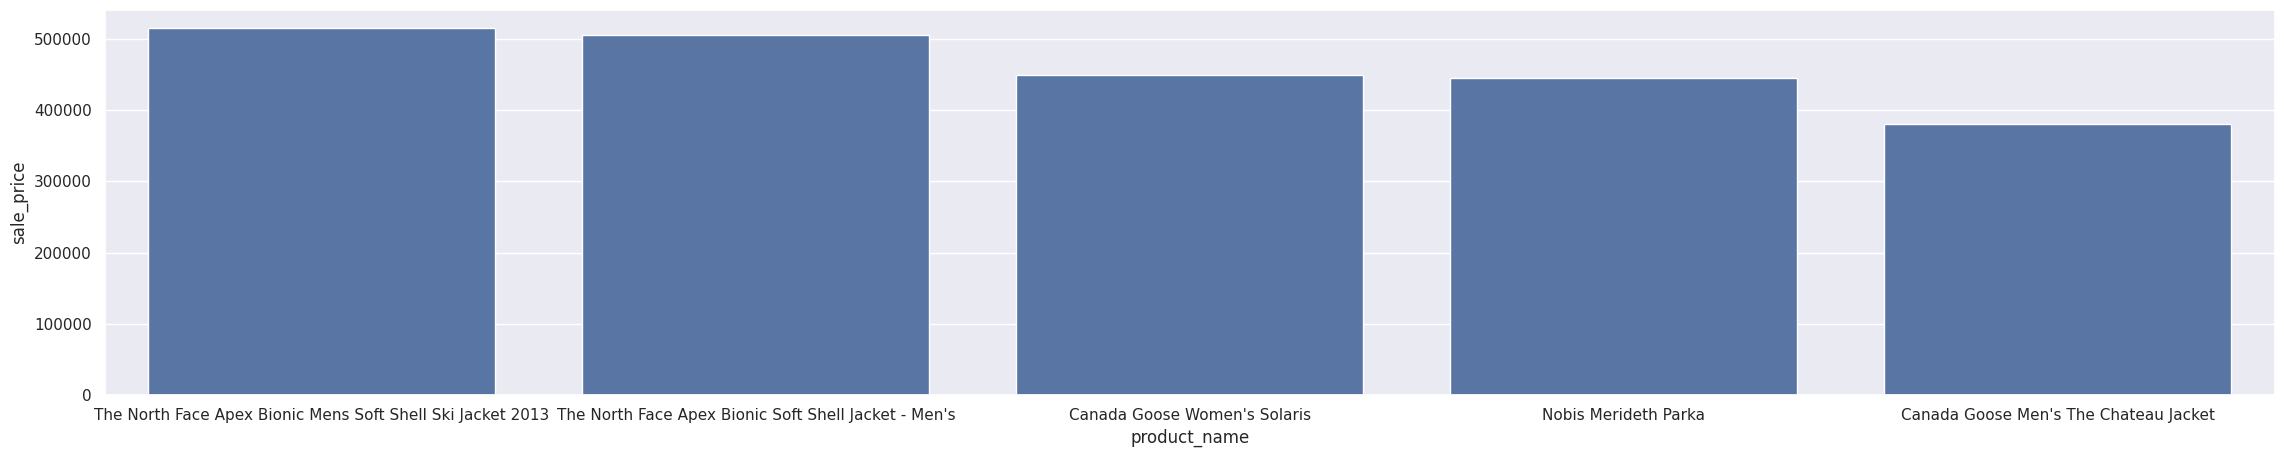

In [ ]:
# Lets find the top  products sold by revenue
revenue = merged.groupby(['product_name'],as_index=False)['sale_price'].sum().sort_values(by='sale_price',ascending=False).head(5)
sns.set(rc={'figure.figsize':(28,5)})
sns.barplot(data=revenue,x='product_name',y='sale_price')

In [ ]:
# To calculate profit, we have create a profit column by subtracting cost from sale_price/product_retail_price.
merged['profit'] = merged['sale_price']-merged['cost']

In [ ]:
# Checking dataframe for profit column
merged.head()

,id_x,order_id,user_id,product_id,inventory_item_id,status,created_at_x,sale_price,id_y,created_at_y,sold_at,cost,product_category,product_name,product_brand,product_retail_price,product_department,product_sku,product_distribution_center_id,profit
0,39964,27520,22002,13844,107800,Complete,2024-01-13 23:58:59+00:00,6.99,67971,2022-07-02 07:09:20+00:00,2022-07-24 06:33:20+00:00,2.76804,Accessories,(ONE) 1 Satin Headband,Funny Girl Designs,6.99,Women,2A3E953A5E3D81E67945BCE5519F84C8,7,4.22196
1,90973,62598,50041,13844,245524,Processing,2020-12-17 23:40:05+00:00,6.99,67971,2022-07-02 07:09:20+00:00,2022-07-24 06:33:20+00:00,2.76804,Accessories,(ONE) 1 Satin Headband,Funny Girl Designs,6.99,Women,2A3E953A5E3D81E67945BCE5519F84C8,7,4.22196
2,25190,17428,13873,13844,67973,Shipped,2022-07-24 06:33:20+00:00,6.99,67971,2022-07-02 07:09:20+00:00,2022-07-24 06:33:20+00:00,2.76804,Accessories,(ONE) 1 Satin Headband,Funny Girl Designs,6.99,Women,2A3E953A5E3D81E67945BCE5519F84C8,7,4.22196
3,27016,18686,14870,13844,72864,Shipped,2021-11-22 02:19:52+00:00,6.99,67971,2022-07-02 07:09:20+00:00,2022-07-24 06:33:20+00:00,2.76804,Accessories,(ONE) 1 Satin Headband,Funny Girl Designs,6.99,Women,2A3E953A5E3D81E67945BCE5519F84C8,7,4.22196
4,37741,25990,20739,13844,101827,Shipped,2023-11-15 13:49:09+00:00,6.99,67971,2022-07-02 07:09:20+00:00,2022-07-24 06:33:20+00:00,2.76804,Accessories,(ONE) 1 Satin Headband,Funny Girl Designs,6.99,Women,2A3E953A5E3D81E67945BCE5519F84C8,7,4.22196


<Axes: xlabel='product_name', ylabel='profit'>

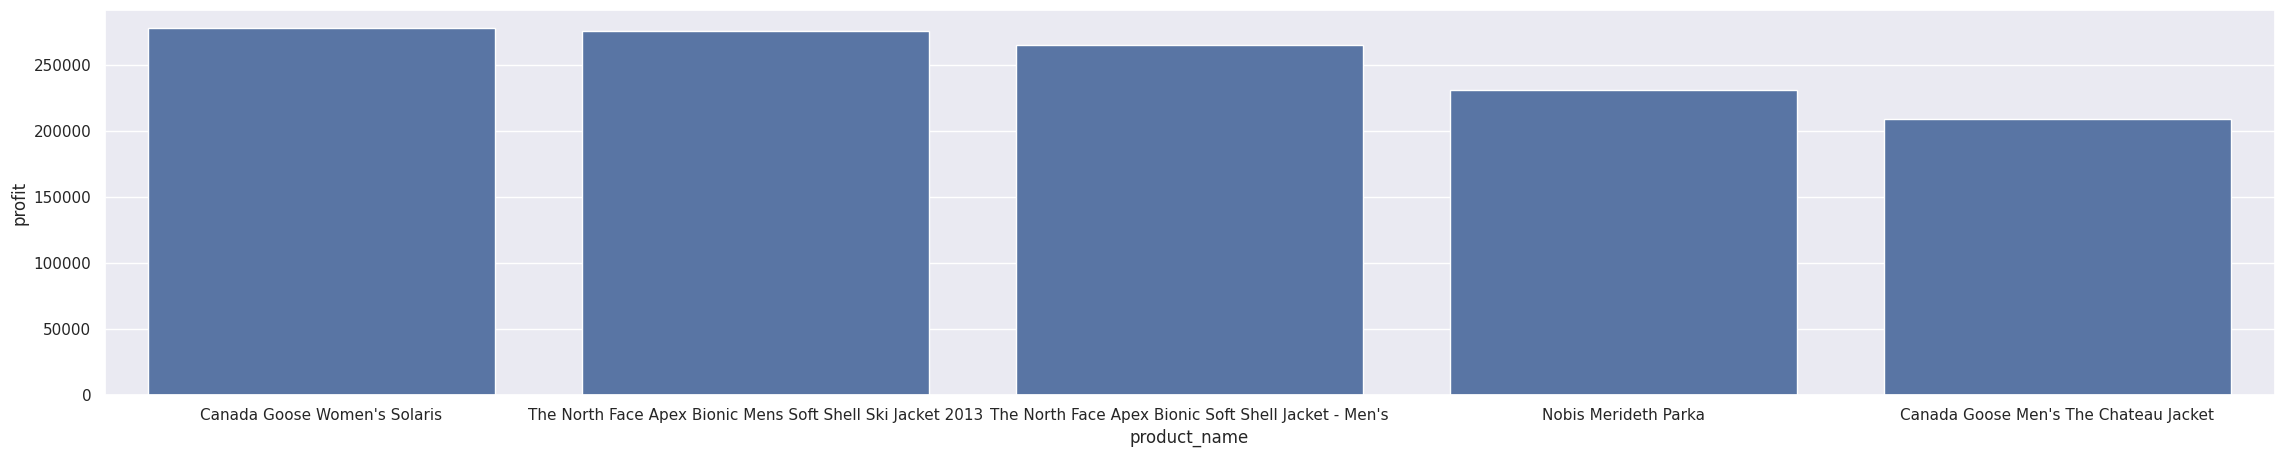

In [ ]:
# Lets plot a bar plot for highest profitable product.
profit = merged.groupby(['product_name'],as_index=False)['profit'].sum().sort_values(by='profit',ascending=False).head(5)
sns.set(rc={'figure.figsize':(28,5)})
sns.barplot(data=profit,x='product_name',y='profit')

# **Final Insights:**

1) The top five selling products are Kenneth Cole Mens Straight Leg Jean, Puma Mens Socks, Wranglesr's Mens Premium Performance Cowboy Cut Jean, Michael Cors Men's 3 Pack Brief and 7 For All Mankinds Mens Standard Classic Straight Leg Jean.
2) The North Face Apex Bionic Mens Soft Shell Ski Jacket 2013 tops by revenue generation but most of the profits are drawn by Canada Goose Womens Solans.

# **Product Performance Analysis:** Explore products.csv to analyse product performance, including costs, categories, and popularity.

In [ ]:
#Importing the csv file.
products = pd.read_csv('/content/drive/My Drive/College Dunia Placement Imarticus/products.csv')

In [ ]:
#Checking shape of order_items
products.shape

(29120, 9)

In [ ]:
#Checking contents of order_items
products.head(5)

,id,cost,category,name,brand,retail_price,department,sku,distribution_center_id
0,13842,2.51875,Accessories,Low Profile Dyed Cotton Twill Cap - Navy W39S55D,MG,6.25,Women,EBD58B8A3F1D72F4206201DA62FB1204,1
1,13928,2.33835,Accessories,Low Profile Dyed Cotton Twill Cap - Putty W39S55D,MG,5.95,Women,2EAC42424D12436BDD6A5B8A88480CC3,1
2,14115,4.87956,Accessories,Enzyme Regular Solid Army Caps-Black W35S45D,MG,10.99,Women,EE364229B2791D1EF9355708EFF0BA34,1
3,14157,4.64877,Accessories,Enzyme Regular Solid Army Caps-Olive W35S45D (...,MG,10.99,Women,00BD13095D06C20B11A2993CA419D16B,1
4,14273,6.50793,Accessories,Washed Canvas Ivy Cap - Black W11S64C,MG,15.99,Women,F531DC20FDE20B7ADF3A73F52B71D0AF,1


In [ ]:
#Checking for null values and its sum, if any.
products.isnull().sum()

id                         0
cost                       0
category                   0
name                       2
brand                     24
retail_price               0
department                 0
sku                        0
distribution_center_id     0
dtype: int64

In [ ]:
# Since the brand column contains 24 null values, we will drop the rows for further analysis.
products.dropna(inplace=True)

In [ ]:
#Checking if the null values are dropped.
products.isnull().sum()

id                        0
cost                      0
category                  0
name                      0
brand                     0
retail_price              0
department                0
sku                       0
distribution_center_id    0
dtype: int64

In [ ]:
# Checking description of the data.
products.describe(include="all")

,id,cost,category,name,brand,retail_price,department,sku,distribution_center_id
count,29094.000000,29094.000000,29094,29094,29094,29094.000000,29094,29094,29094.000000
unique,NaN,NaN,26,27288,2756,NaN,2,29094,NaN
top,NaN,NaN,Intimates,Wrangler Men's Premium Performance Cowboy Cut ...,Allegra K,NaN,Women,EBD58B8A3F1D72F4206201DA62FB1204,NaN
freq,NaN,NaN,2358,8,1034,NaN,15976,1,NaN
mean,14558.540764,28.490452,NaN,NaN,NaN,59.239441,NaN,NaN,4.984773
std,8406.897280,30.634308,NaN,NaN,NaN,65.909439,NaN,NaN,2.901743
min,1.000000,0.008300,NaN,NaN,NaN,0.020000,NaN,NaN,1.000000
25%,7276.250000,11.275338,NaN,NaN,NaN,24.000000,NaN,NaN,2.000000
50%,14558.500000,19.688765,NaN,NaN,NaN,39.990002,NaN,NaN,5.000000
75%,21838.750000,34.450375,NaN,NaN,NaN,69.949997,NaN,NaN,8.000000


<Axes: xlabel='name', ylabel='cost'>

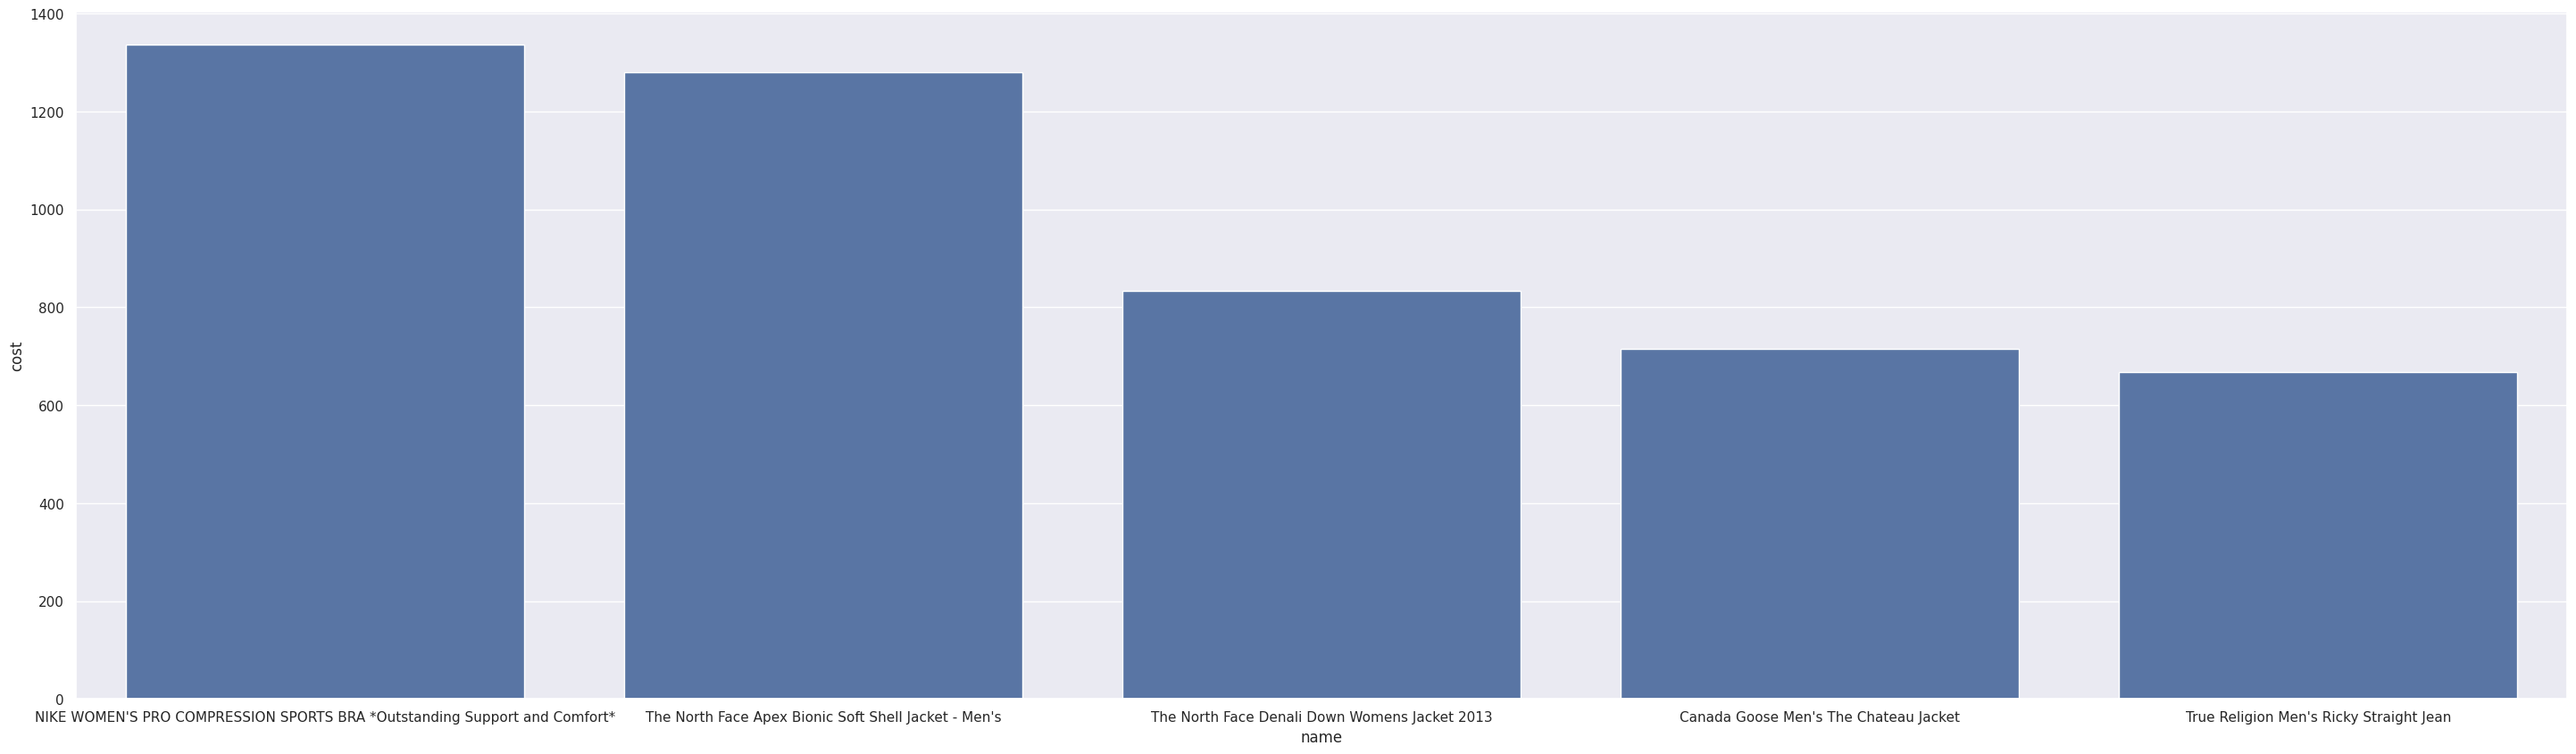

In [ ]:
# Lets plot a bar graph for top 5 products with lowest cost
cost = products.groupby(['name'],as_index=False)['cost'].sum().sort_values(by='cost',ascending=False).head(5)
sns.set(rc={'figure.figsize':(36,10)})
sns.barplot(data=cost,x='name',y='cost')

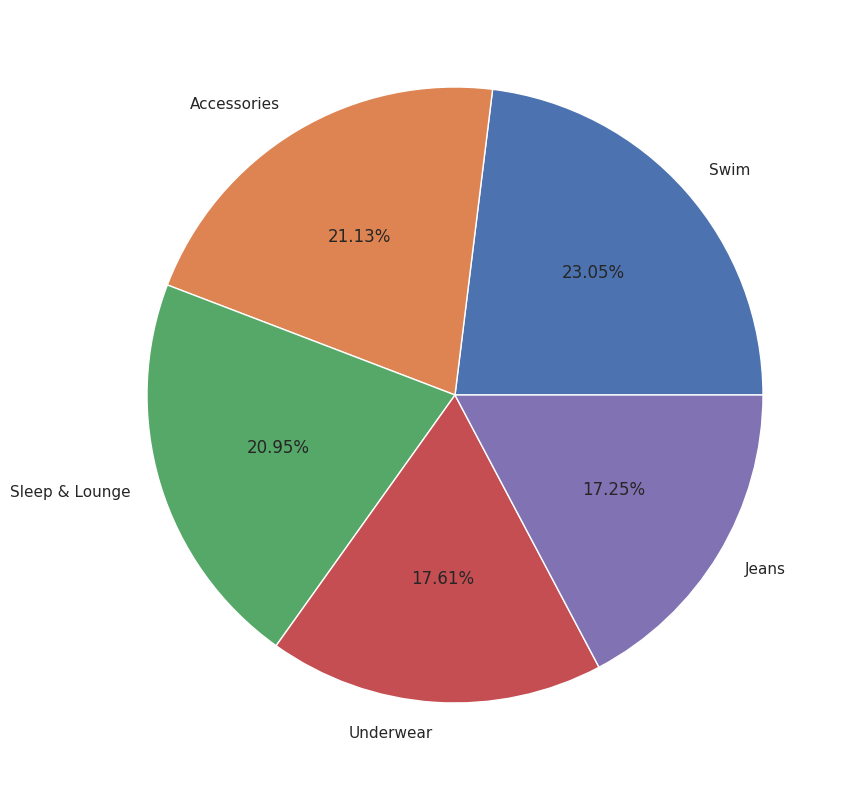

In [ ]:
# Lets plot a pie chart to show top 5 categories sold

import matplotlib.pyplot as plt
categories = products.groupby(['category'],as_index=False)['id'].sum().sort_values(by='id',ascending=False).head(5)
plt.pie(categories['id'], labels=categories['category'], autopct='%.2f%%')
plt.show()

<Axes: xlabel='name', ylabel='id'>

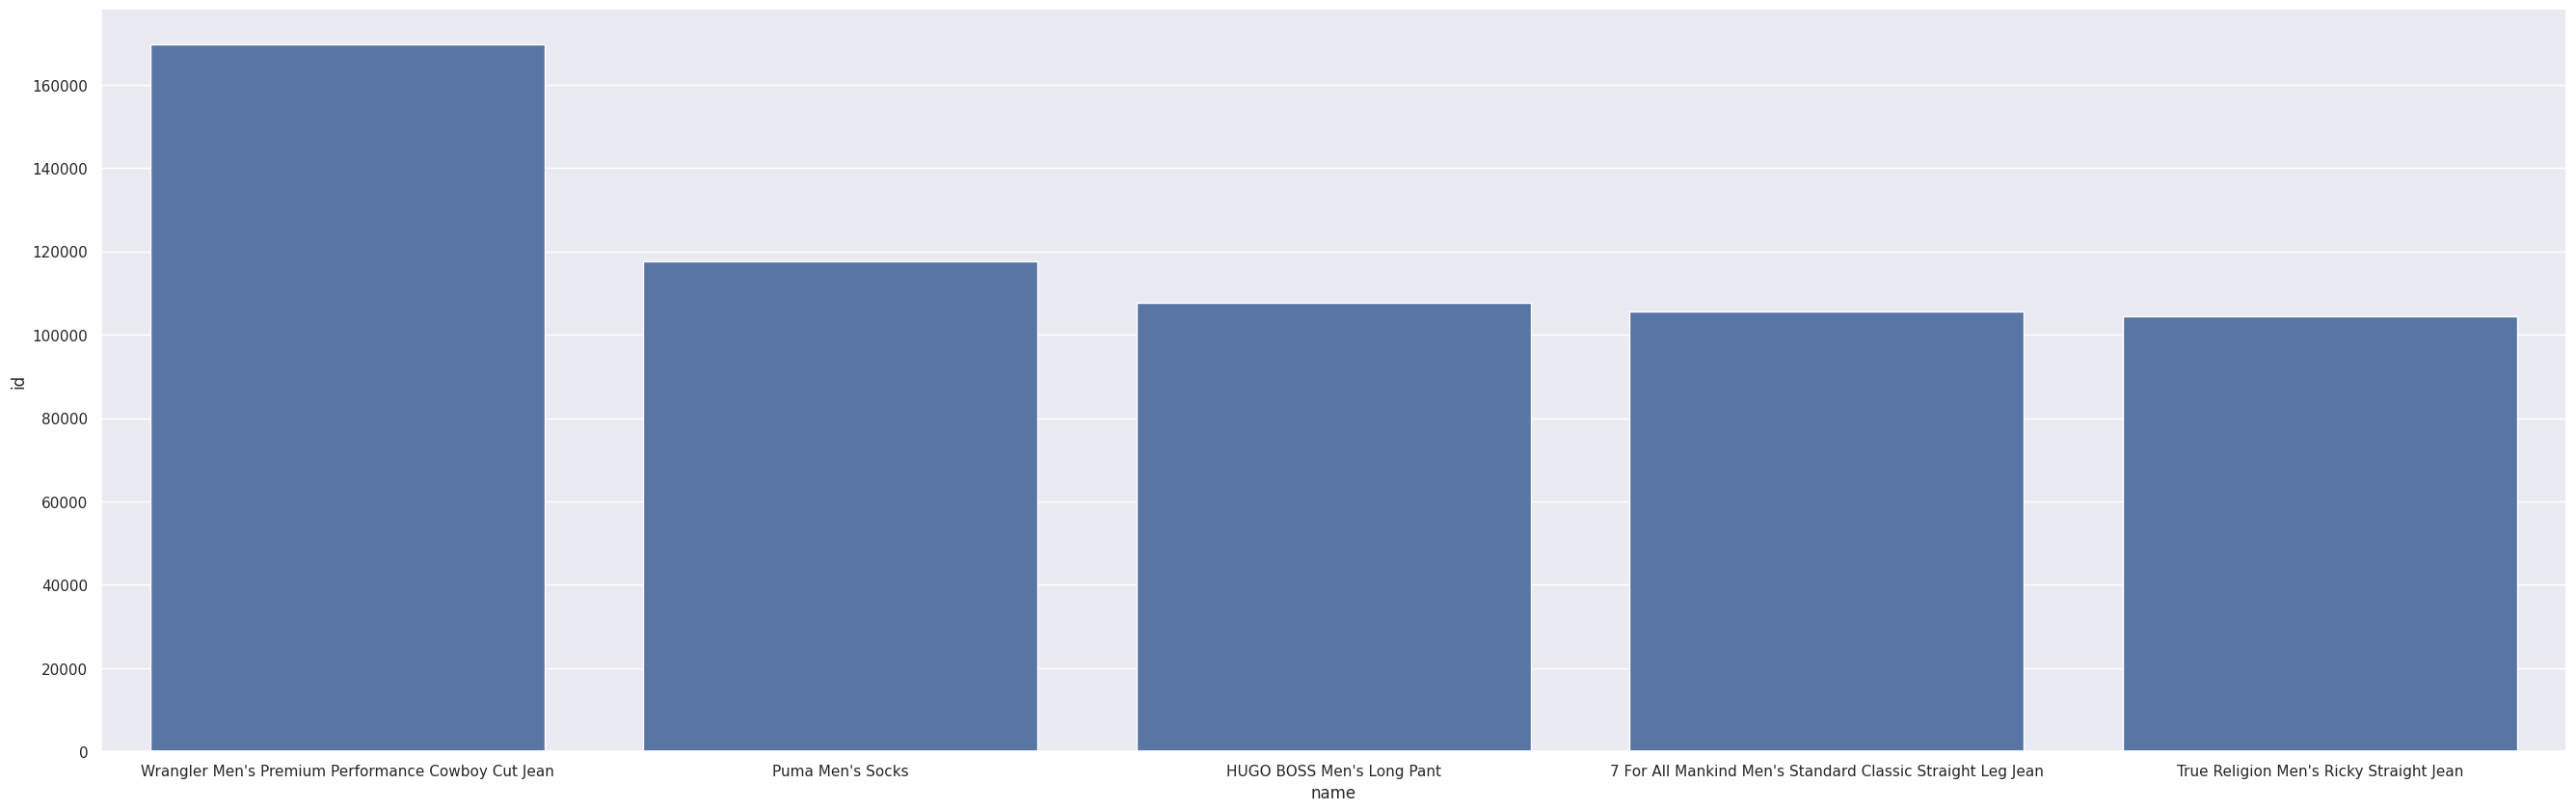

In [ ]:
# Lets find the top products by popularity.
popularity = products.groupby(['name'],as_index=False)['id'].sum().sort_values(by='id',ascending=False).head(5)
sns.barplot(data=popularity,x='name',y='id')

**Final Insights:**

1) The top 5 costliest products which will generate more revenue are Nike Pro Compression Sports Bra, The North Face Apex Bionic Soft Shell Jacket-Mens, The North Face Denelli Down Women's Jacket 2013, Canada Goose Mens The Chateau Jacket and The Religions Mens Ricky Straight Jean.
2) Products in swim wear, Accessories and Slep & Lounge are generating highest revenue.
3) The most popular product at the ecommerce website is wrangler Mens Premium Performance Cowboy Cut Jean.

# **User Demographics Analysis:** Use users.csv to analyse user demographics, such as age, gender, and location.

In [ ]:
#Since users csv file is loaded and processed for analysis. We will recall it.
users.head()

,id,first_name,last_name,email,age,gender,state,street_address,postal_code,city,country,latitude,longitude,traffic_source,created_at
0,457,Timothy,Bush,timothybush@example.net,65,M,Acre,87620 Johnson Hills,69917-400,Rio Branco,Brasil,-9.945568,-67.83561,Search,2022-07-19 13:51:00+00:00
1,6578,Elizabeth,Martinez,elizabethmartinez@example.com,34,F,Acre,1705 Nielsen Land,69917-400,Rio Branco,Brasil,-9.945568,-67.83561,Search,2023-11-08 18:49:00+00:00
2,36280,Christopher,Mendoza,christophermendoza@example.net,13,M,Acre,125 Turner Isle Apt. 264,69917-400,Rio Branco,Brasil,-9.945568,-67.83561,Email,2019-08-24 06:10:00+00:00
3,60193,Jimmy,Conner,jimmyconner@example.com,64,M,Acre,0966 Jose Branch Apt. 008,69917-400,Rio Branco,Brasil,-9.945568,-67.83561,Search,2020-02-15 11:26:00+00:00
4,64231,Natasha,Wilson,natashawilson@example.net,25,F,Acre,20798 Phillip Trail Apt. 392,69917-400,Rio Branco,Brasil,-9.945568,-67.83561,Search,2020-03-13 06:45:00+00:00


In [ ]:
#Checking for null values and its sum, if any.
users.isnull().sum()

id                0
first_name        0
last_name         0
email             0
age               0
gender            0
state             0
street_address    0
postal_code       0
city              0
country           0
latitude          0
longitude         0
traffic_source    0
created_at        0
dtype: int64

In [ ]:
# Checking description of the data.
users.describe(include="all")

,id,first_name,last_name,email,age,gender,state,street_address,postal_code,city,country,latitude,longitude,traffic_source,created_at
count,99042.000000,99042,99042,99042,99042.00000,99042,99042,99042,99042,99042,99042,99042.000000,99042.000000,99042,99042
unique,NaN,690,1000,83293,NaN,2,229,99040,15562,7883,16,NaN,NaN,5,96827
top,NaN,Michael,Smith,michaelsmith@example.org,NaN,F,Guangdong,953 Jennifer Stravenue,02675-031,Shanghai,China,NaN,NaN,Search,2023-12-25 01:28:00+00:00
freq,NaN,2293,2171,23,NaN,49714,5380,2,406,2525,34133,NaN,NaN,69416,4
mean,50011.128642,NaN,NaN,NaN,41.04380,NaN,NaN,NaN,NaN,NaN,NaN,28.528946,25.671469,NaN,NaN
std,28871.285618,NaN,NaN,NaN,17.04341,NaN,NaN,NaN,NaN,NaN,NaN,21.932694,90.050029,NaN,NaN
min,1.000000,NaN,NaN,NaN,12.00000,NaN,NaN,NaN,NaN,NaN,NaN,-43.007536,-158.164931,NaN,NaN
25%,25002.250000,NaN,NaN,NaN,26.00000,NaN,NaN,NaN,NaN,NaN,NaN,26.476449,-50.486332,NaN,NaN
50%,50023.500000,NaN,NaN,NaN,41.00000,NaN,NaN,NaN,NaN,NaN,NaN,35.312641,5.156919,NaN,NaN
75%,75015.750000,NaN,NaN,NaN,56.00000,NaN,NaN,NaN,NaN,NaN,NaN,40.738150,116.391848,NaN,NaN


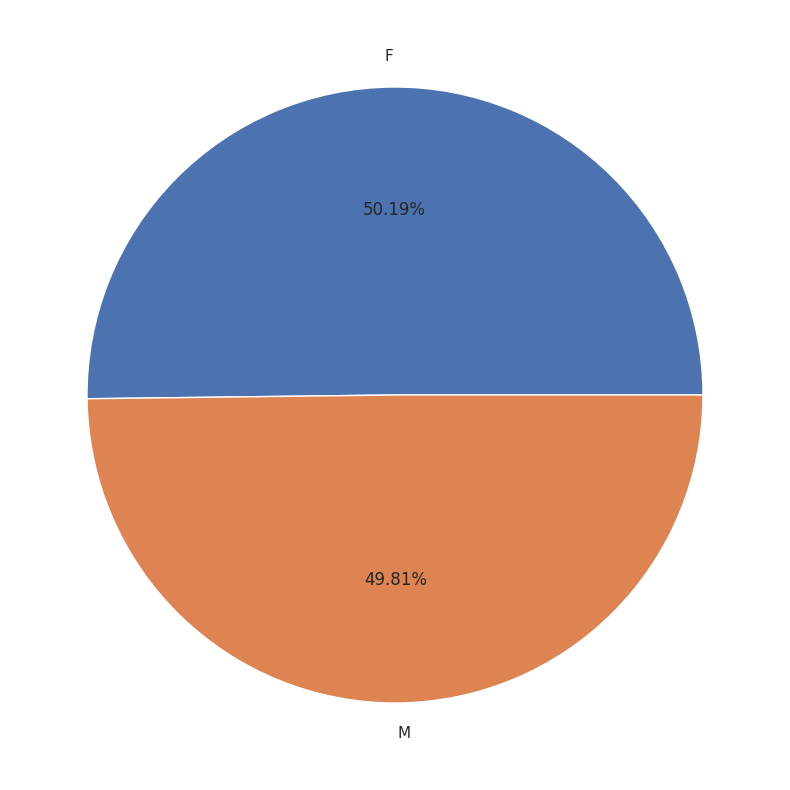

In [ ]:
# Lets plot a pie chart for gender distribution in users
gender = users['gender'].value_counts()
plt.pie(gender, labels=gender.index, autopct='%.2f%%')
plt.show()

<Axes: >

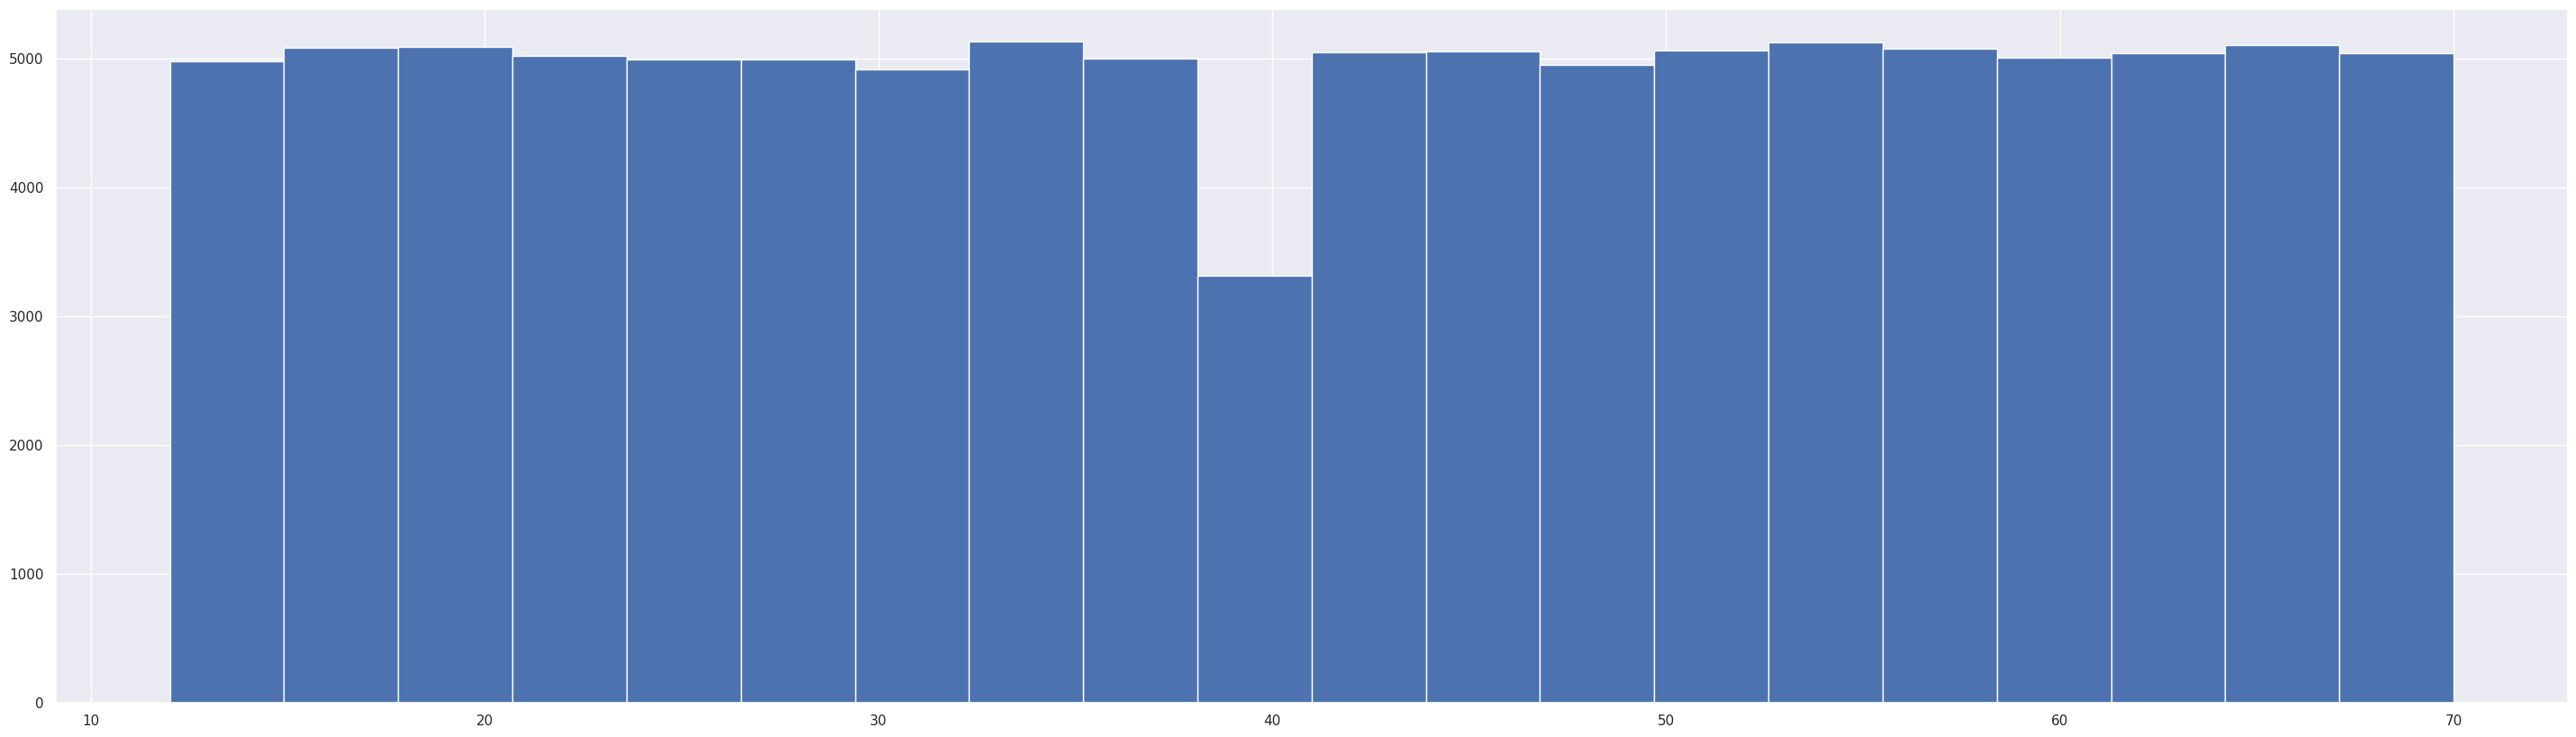

In [ ]:
# Lets plot a histogram of age of users
users['age'].hist(bins=20)

# **Final Insights:**

1) The majority of our users are in the age group of 25-35.
2) There are more female users than male users on our website.
3) As mentioned earlier most of our users are from China, United States and Brasil.

# **Order Fulfilment Analysis:** Analyse order_items.csv and orders.csv to understand order fulfilment timelines and status.

In [ ]:
# Since order items csv is loaded and processed for analysis, we will recall it.
order_items.head()

,id,order_id,user_id,product_id,inventory_item_id,status,created_at,shipped_at,delivered_at,returned_at,sale_price
0,152013,104663,83582,14235,410368,Cancelled,2023-05-07 06:08:40+00:00,NaN,NaN,NaN,0.02
1,40993,28204,22551,14235,110590,Complete,2023-03-14 03:47:21+00:00,2023-03-15 22:57:00+00:00,2023-03-18 01:08:00+00:00,NaN,0.02
2,51224,35223,28215,14235,138236,Complete,2023-12-05 13:25:30+00:00,2023-12-06 01:20:00+00:00,2023-12-10 10:04:00+00:00,NaN,0.02
3,36717,25278,20165,14235,99072,Shipped,2023-12-22 20:48:19+00:00,2023-12-24 16:44:00+00:00,NaN,NaN,0.02
4,131061,90241,71954,14235,353798,Shipped,2022-06-19 16:57:59+00:00,2022-06-19 19:29:00+00:00,NaN,NaN,0.02


In [ ]:
# Importing the csv file
orders = pd.read_csv('/content/drive/My Drive/College Dunia Placement Imarticus/orders.csv')

In [ ]:
# #Checking shape of orders
orders.shape

(125226, 9)

In [ ]:
#Checking contents of orders
orders.head(10)

,order_id,user_id,status,gender,created_at,returned_at,shipped_at,delivered_at,num_of_item
0,8,5,Cancelled,F,2022-10-20 10:03:00+00:00,NaN,NaN,NaN,3
1,60,44,Cancelled,F,2023-01-20 02:12:00+00:00,NaN,NaN,NaN,1
2,64,46,Cancelled,F,2021-12-06 09:11:00+00:00,NaN,NaN,NaN,1
3,89,65,Cancelled,F,2020-08-13 09:58:00+00:00,NaN,NaN,NaN,1
4,102,76,Cancelled,F,2023-01-17 08:17:00+00:00,NaN,NaN,NaN,2
5,117,89,Cancelled,F,2023-07-31 13:25:00+00:00,NaN,NaN,NaN,1
6,143,118,Cancelled,F,2020-04-21 02:59:00+00:00,NaN,NaN,NaN,1
7,153,124,Cancelled,F,2022-07-10 16:42:00+00:00,NaN,NaN,NaN,2
8,182,147,Cancelled,F,2024-01-15 10:29:28.317841+00:00,NaN,NaN,NaN,3
9,183,148,Cancelled,F,2023-07-04 09:25:00+00:00,NaN,NaN,NaN,1


In [ ]:
#Checking for null values and its sum, if any.
orders.isnull().sum()

order_id             0
user_id              0
status               0
gender               0
created_at           0
returned_at     112696
shipped_at       43765
delivered_at     81342
num_of_item          0
dtype: int64

In [ ]:
# Lets merge order items and orders by right join on order id as a new dataframe 'merged' for further analysis
merged = pd.merge(order_items, orders, how="right", on=["order_id"])

In [ ]:
# Checking contents of merged dataframe
merged.head(5)

,id,order_id,user_id_x,product_id,inventory_item_id,status_x,created_at_x,shipped_at_x,delivered_at_x,returned_at_x,sale_price,user_id_y,status_y,gender,created_at_y,returned_at_y,shipped_at_y,delivered_at_y,num_of_item
0,13,8,5,6998,36,Cancelled,2022-10-22 07:55:58+00:00,NaN,NaN,NaN,15.67,5,Cancelled,F,2022-10-20 10:03:00+00:00,NaN,NaN,NaN,3
1,11,8,5,7173,29,Cancelled,2022-10-20 06:35:35+00:00,NaN,NaN,NaN,24.99,5,Cancelled,F,2022-10-20 10:03:00+00:00,NaN,NaN,NaN,3
2,12,8,5,1488,33,Cancelled,2022-10-24 07:19:09+00:00,NaN,NaN,NaN,24.99,5,Cancelled,F,2022-10-20 10:03:00+00:00,NaN,NaN,NaN,3
3,96,60,44,14717,275,Cancelled,2023-01-20 00:35:38+00:00,NaN,NaN,NaN,16.99,44,Cancelled,F,2023-01-20 02:12:00+00:00,NaN,NaN,NaN,1
4,100,64,46,9588,287,Cancelled,2021-12-06 06:35:44+00:00,NaN,NaN,NaN,36.00,46,Cancelled,F,2021-12-06 09:11:00+00:00,NaN,NaN,NaN,1


In [ ]:
# Checking shape of merged dataframe
merged.shape

(181759, 19)

In [ ]:
# Checking description of merged dataframe
merged.describe(include="all")

,id,order_id,user_id_x,product_id,inventory_item_id,status_x,created_at_x,shipped_at_x,delivered_at_x,returned_at_x,sale_price,user_id_y,status_y,gender,created_at_y,returned_at_y,shipped_at_y,delivered_at_y,num_of_item
count,181759.000000,181759.000000,181759.000000,181759.000000,181759.000000,181759,181759,118281,63841,18232,181759.000000,181759.000000,181759,181759,181759,18232,118281,63841,181759.000000
unique,NaN,NaN,NaN,NaN,NaN,5,181526,79123,43187,12478,NaN,NaN,5,2,117373,12478,79123,43187,NaN
top,NaN,NaN,NaN,NaN,NaN,Shipped,2023-08-07 01:21:57+00:00,2023-12-26 19:56:00+00:00,2023-09-06 16:25:00+00:00,2023-07-15 19:49:00+00:00,NaN,NaN,Shipped,F,2024-01-15 12:57:11.291061+00:00,2023-07-15 19:49:00+00:00,2023-12-26 19:56:00+00:00,2023-09-06 16:25:00+00:00,NaN
freq,NaN,NaN,NaN,NaN,NaN,54440,2,9,9,6,NaN,NaN,54440,91009,11,6,9,9,NaN
mean,90880.000000,62579.982609,49983.272020,15254.151838,245291.860007,NaN,NaN,NaN,NaN,NaN,59.568544,49983.272020,NaN,NaN,NaN,NaN,NaN,NaN,1.901457
std,52469.448126,36125.987285,28830.895739,8413.482833,141661.912894,NaN,NaN,NaN,NaN,NaN,66.657262,28830.895739,NaN,NaN,NaN,NaN,NaN,NaN,1.066470
min,1.000000,1.000000,1.000000,1.000000,3.000000,NaN,NaN,NaN,NaN,NaN,0.020000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
25%,45440.500000,31266.500000,25031.500000,7979.500000,122565.000000,NaN,NaN,NaN,NaN,NaN,24.500000,25031.500000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
50%,90880.000000,62529.000000,49983.000000,15966.000000,245284.000000,NaN,NaN,NaN,NaN,NaN,39.990002,49983.000000,NaN,NaN,NaN,NaN,NaN,NaN,2.000000
75%,136319.500000,93845.500000,74867.500000,22504.000000,367983.000000,NaN,NaN,NaN,NaN,NaN,69.949997,74867.500000,NaN,NaN,NaN,NaN,NaN,NaN,2.000000


<Axes: xlabel='status_x', ylabel='id'>

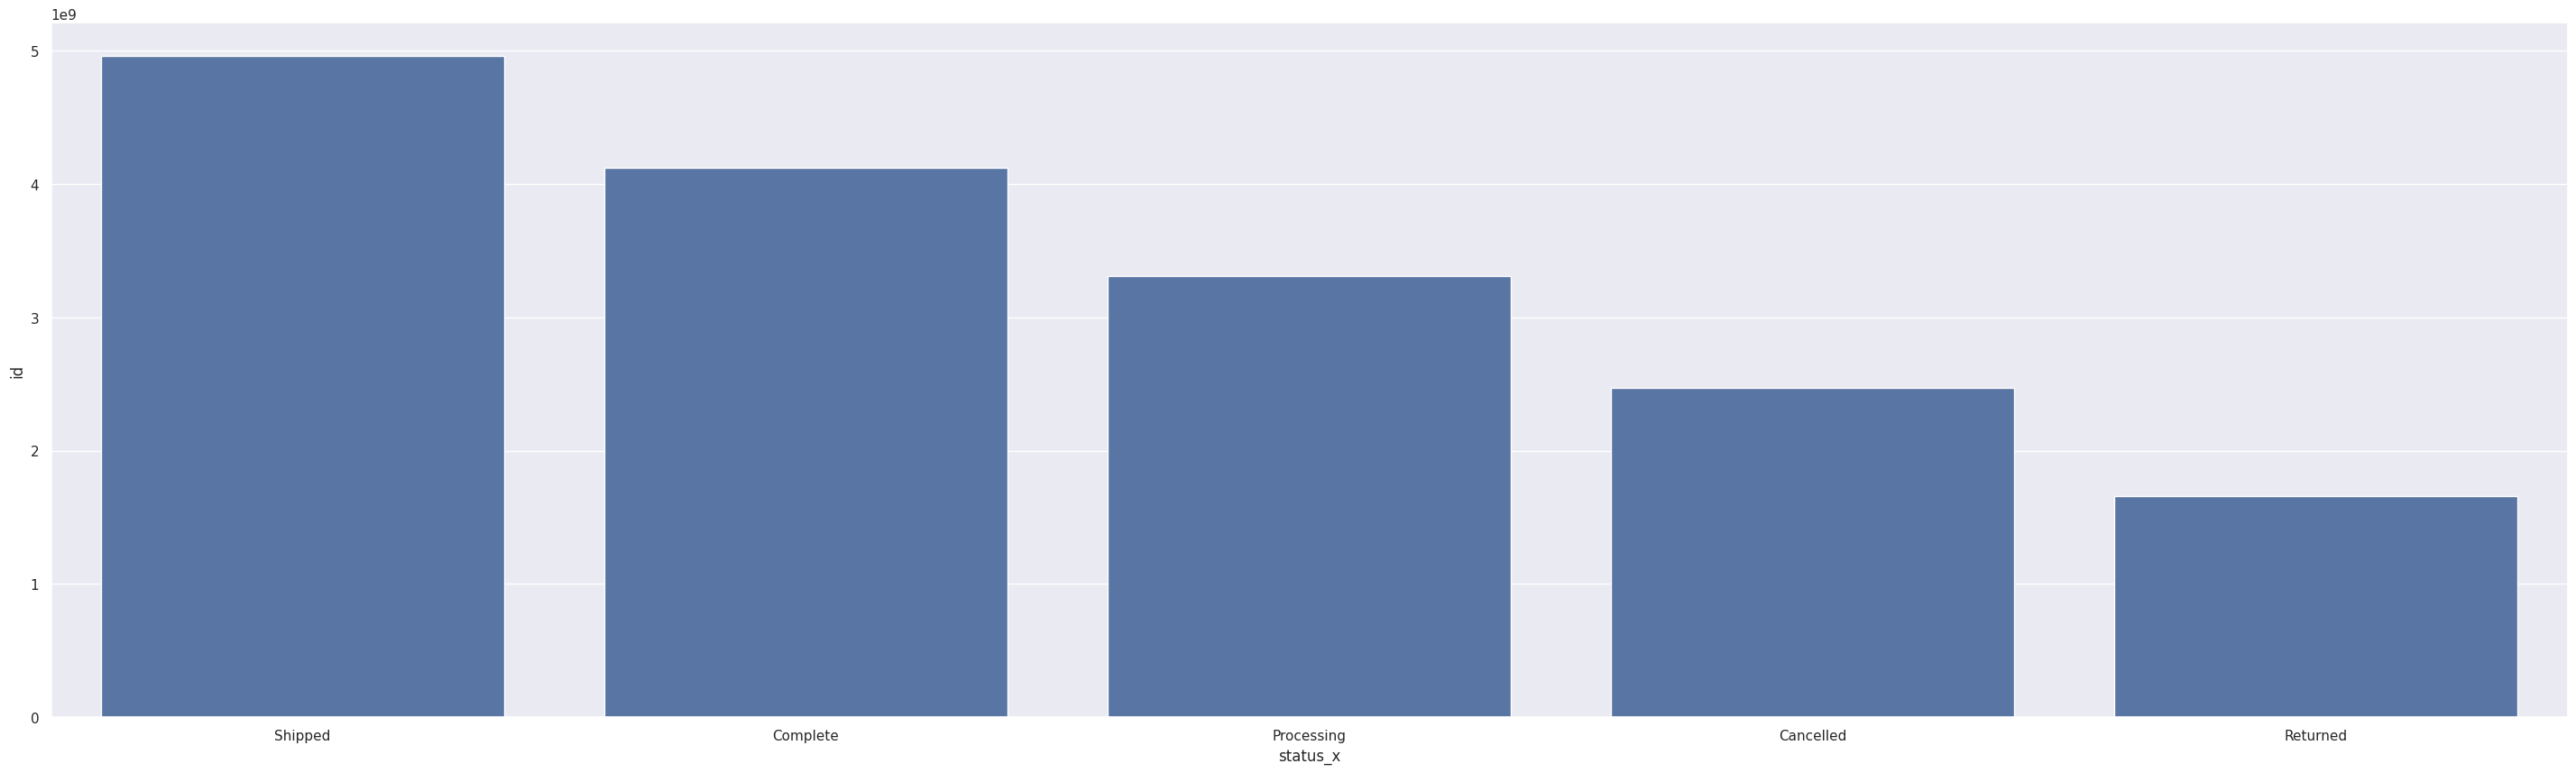

In [ ]:
# Lets plot a bar plot for order status
status = merged.groupby(['status_x'],as_index=False)['id'].sum().sort_values(by='id',ascending=False).head(5)
sns.barplot(data=status,x='status_x',y='id')

In [ ]:
# Lets check datatype of merged.
merged.dtypes


id                     int64
order_id               int64
user_id_x              int64
product_id             int64
inventory_item_id      int64
status_x              object
created_at_x          object
shipped_at_x          object
delivered_at_x        object
returned_at_x         object
sale_price           float64
user_id_y              int64
status_y              object
gender                object
created_at_y          object
returned_at_y         object
shipped_at_y          object
delivered_at_y        object
num_of_item            int64
dtype: object

In [ ]:
# Lets convert datatypr from object to datetime of two most useful columns.
merged['created_at_x'] = pd.to_datetime(merged['created_at_x'], infer_datetime_format=True)
merged['delivered_at_x'] = pd.to_datetime(merged['delivered_at_x'], infer_datetime_format=True)

In [ ]:
# Lets check datatype of merged again
merged.dtypes

id                                 int64
order_id                           int64
user_id_x                          int64
product_id                         int64
inventory_item_id                  int64
status_x                          object
created_at_x         datetime64[ns, UTC]
shipped_at_x                      object
delivered_at_x       datetime64[ns, UTC]
returned_at_x                     object
sale_price                       float64
user_id_y                          int64
status_y                          object
gender                            object
created_at_y                      object
returned_at_y                     object
shipped_at_y                      object
delivered_at_y                    object
num_of_item                        int64
dtype: object

In [ ]:
# Lets add a new column number of days subtracting delivery and created date in user

merged['number_of_days'] = (merged['delivered_at_x'] - merged['created_at_x']).dt.days


In [ ]:
# Check for nwly added column.
merged.head(5)

,id,order_id,user_id_x,product_id,inventory_item_id,status_x,created_at_x,shipped_at_x,delivered_at_x,returned_at_x,sale_price,user_id_y,status_y,gender,created_at_y,returned_at_y,shipped_at_y,delivered_at_y,num_of_item,number_of_days
0,13,8,5,6998,36,Cancelled,2022-10-22 07:55:58+00:00,NaN,NaT,NaN,15.67,5,Cancelled,F,2022-10-20 10:03:00+00:00,NaN,NaN,NaN,3,NaN
1,11,8,5,7173,29,Cancelled,2022-10-20 06:35:35+00:00,NaN,NaT,NaN,24.99,5,Cancelled,F,2022-10-20 10:03:00+00:00,NaN,NaN,NaN,3,NaN
2,12,8,5,1488,33,Cancelled,2022-10-24 07:19:09+00:00,NaN,NaT,NaN,24.99,5,Cancelled,F,2022-10-20 10:03:00+00:00,NaN,NaN,NaN,3,NaN
3,96,60,44,14717,275,Cancelled,2023-01-20 00:35:38+00:00,NaN,NaT,NaN,16.99,44,Cancelled,F,2023-01-20 02:12:00+00:00,NaN,NaN,NaN,1,NaN
4,100,64,46,9588,287,Cancelled,2021-12-06 06:35:44+00:00,NaN,NaT,NaN,36.00,46,Cancelled,F,2021-12-06 09:11:00+00:00,NaN,NaN,NaN,1,NaN


<Axes: xlabel='number_of_days', ylabel='id'>

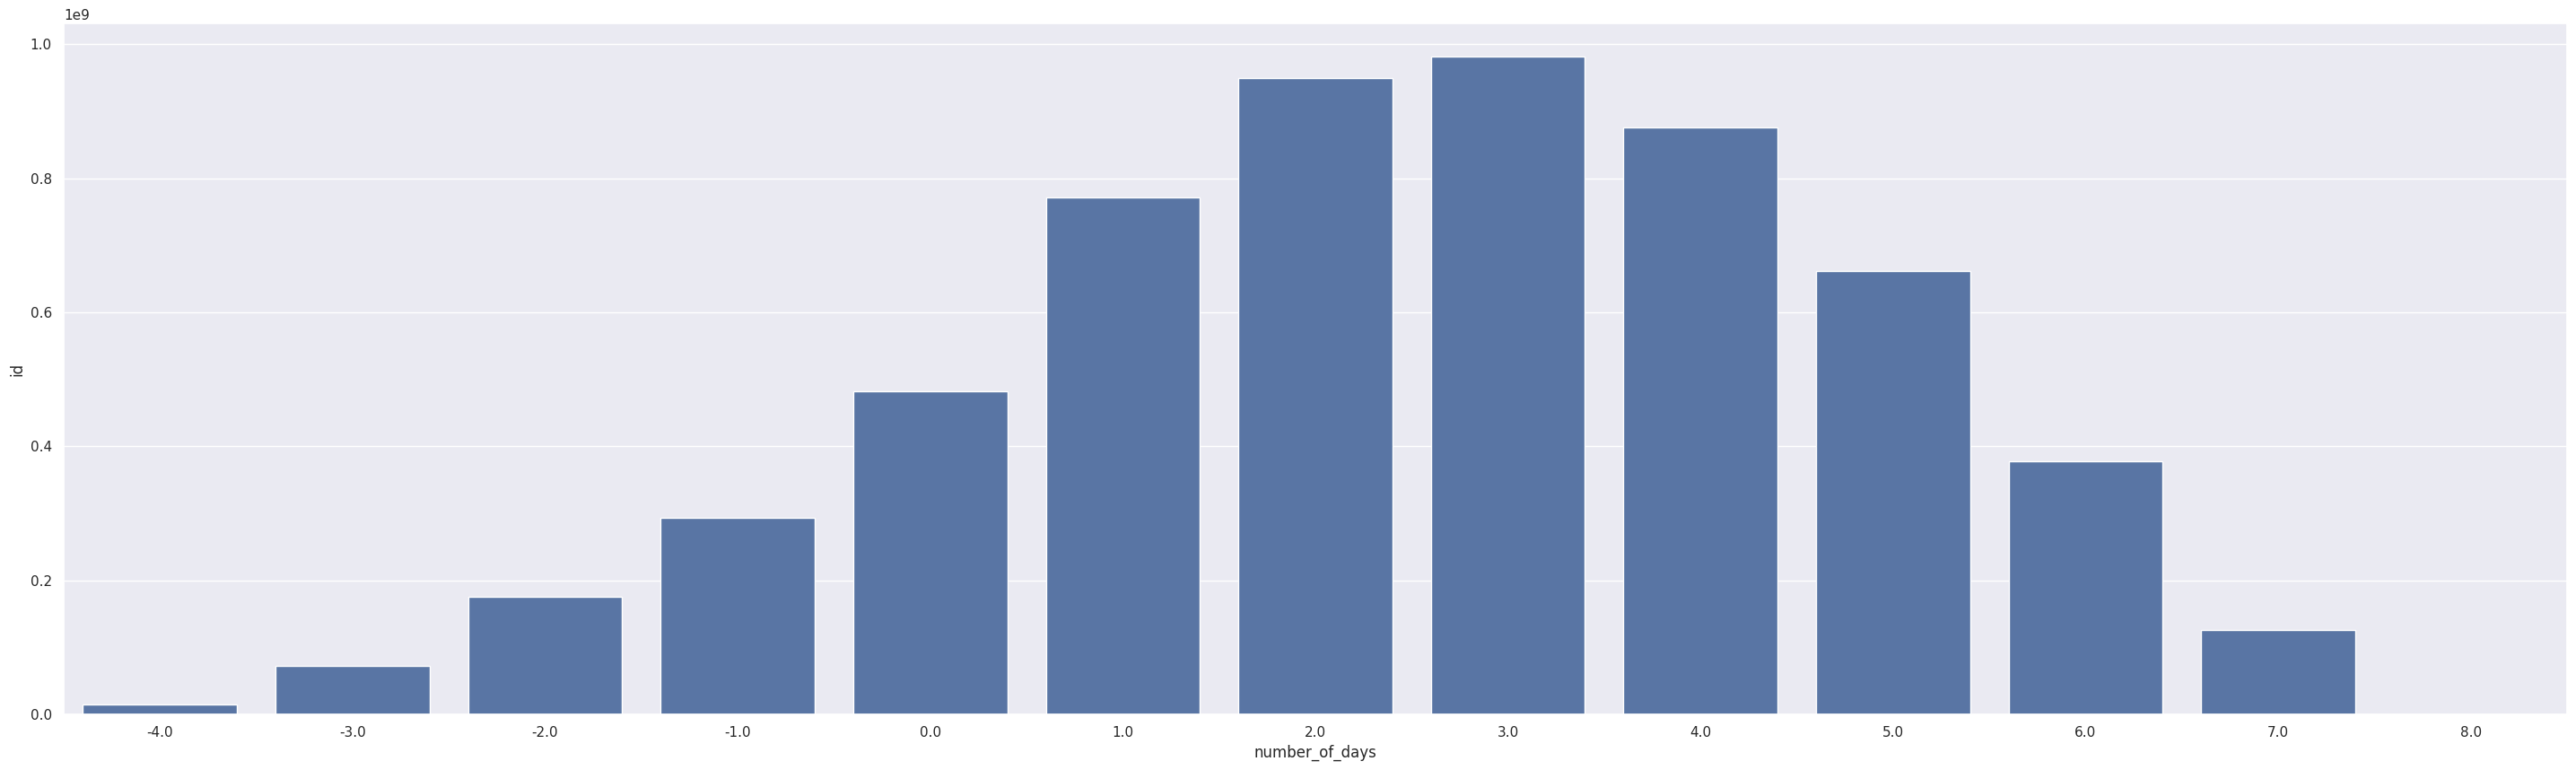

In [ ]:
# Lets plot a bar grapgh of count of number of days taken to deliver a product
fulfil = merged.groupby(['number_of_days'],as_index=False)['id'].sum().sort_values(by='id',ascending=True)
sns.barplot(x='number_of_days', y='id',data= fulfil)

# **Final Insights:**

1) The majority of our orders are in the status of Shipped and completed.
2) The average order fulfilment timeline is 2-4 days.
3) We need to improve our order fulfilment timeline to reduce the number of orders in the status of Processing.